# Auto generated report for all zones

This notebook generates for each available geographic zone a summary of the most recent simulation.


## Preparation

### Loading libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, Markdown, Latex

In [3]:
import os
from functools import partial

In [4]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
from numpy import unique

In [5]:
from model_analysis import * 

In [6]:
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import numpy as np

### Loading data

In [7]:
run_manifest = read_manifest('run-manifest.csv')
analysis_set = get_analysis_set(run_manifest)

In [8]:
def add_to_zone_dict(zone_dict, row, i, zone):
    zone_dict[zone] = {
        "index": i,
        "date": row["last available data"],
        "version": row["version"],
    }

zone_dict = {}
for i, row in analysis_set.iterrows():
    for zone in row["modelling zones"]:
        if zone not in zone_dict:
            add_to_zone_dict(zone_dict, row, i, zone)
        elif (zone_dict[zone]["date"] < row["last available data"])\
            or (zone_dict[zone]["date"] == row["last available data"]
                and zone_dict[zone]["version"] < row["version"]):
            add_to_zone_dict(zone_dict, row, i, zone)
        

In [9]:
indices = unique([zone_dict[d]['index'] for d in zone_dict])
country_2_region = {}
for idx in indices:
    for country in analysis_set.loc[idx,].model.data['ifr']['country'].unique():
        country_2_region[country] = {}

    for _, row in analysis_set.loc[idx,].model.data['ifr'].iterrows():
        country_2_region[row['country']][row['region']] = zone_dict[row['region']]['index']


## Plotting functions

First we define a custom process that will print for each zone.

In [10]:
def process_zone(zone, zone_dict, model_data, title_ext=""):
    display(Markdown(
        f"### {zone}{title_ext} \n\n Latest simulation on data from {zone_dict['date']}"
        + f" with version {zone_dict['version']}"
    ))
    axs = plot_zones_summary(zone, model_data)
    axis_date_limits(axs, max_date='2020-06-01')
    plt.show()
    plt.close()

In [11]:
def print_zone(file_in, img_dir, file_dir, zone, zone_dict, model_data, title_ext="", img_ext=".png"):
    img_file = os.path.join(img_dir, (zone + '_' + zone_dict['date'].strip() + img_ext).replace(" ", "_"))
    
    unix_rel_img_path = os.path.relpath(img_file, file_dir).replace('\\','/')
    file_in.write(
        f"### {zone}{title_ext} \n\n Latest simulation on data from {zone_dict['date']}"
        + f" with version {zone_dict['version']} \n\n ![img_file]({unix_rel_img_path})\n\n"
    )
    axs = plot_zones_summary(zone, model_data)
    axis_date_limits(axs, max_date='2020-06-01')
    axs[0].figure.savefig(img_file, bbox_inches='tight')
    plt.close(axs[0].figure)

And then we apply this function to every zone that has been identified.

In [12]:
def apply_process_to_data(
    process_func, country_2_region, analysis_set, zone_dict,
    display_func=lambda x:display(Markdown(x))):
    display_func("# Country reports\n")
    for country in country_2_region:
        display_func(f"## {country}\n")
        if country in country_2_region[country]:
            idx = zone_dict[country]['index']
            process_func(
                country, zone_dict[country], 
                analysis_set.loc[idx, 'model'].data,
                title_ext=" - (country)")
        
        for zone in sorted([z for z in country_2_region[country]]):
            if zone != country:
                idx = zone_dict[zone]['index']
                process_func(
                    zone, zone_dict[zone], 
                    analysis_set.loc[idx, 'model'].data)
                break
        break

# Country reports


## France


### France - (country) 

 Latest simulation on data from  2020-05-10  with version  v3

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


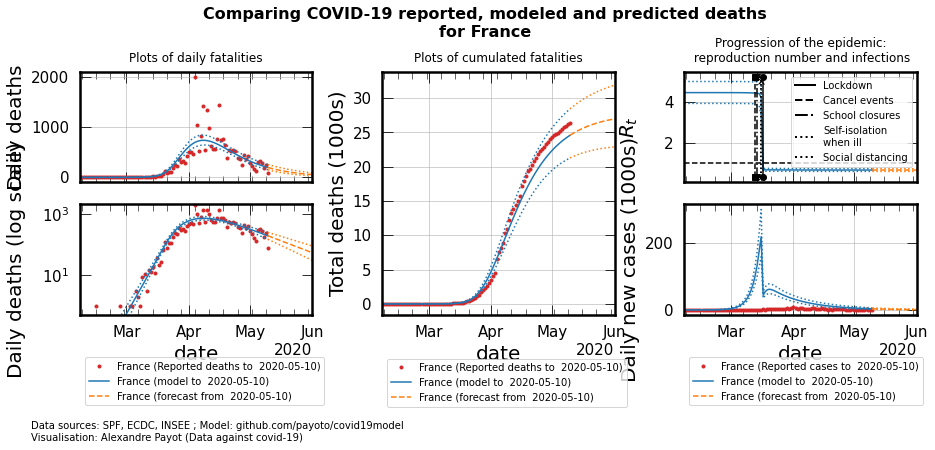

### Auvergne-Rhône-Alpes 

 Latest simulation on data from  2020-05-10  with version  v3

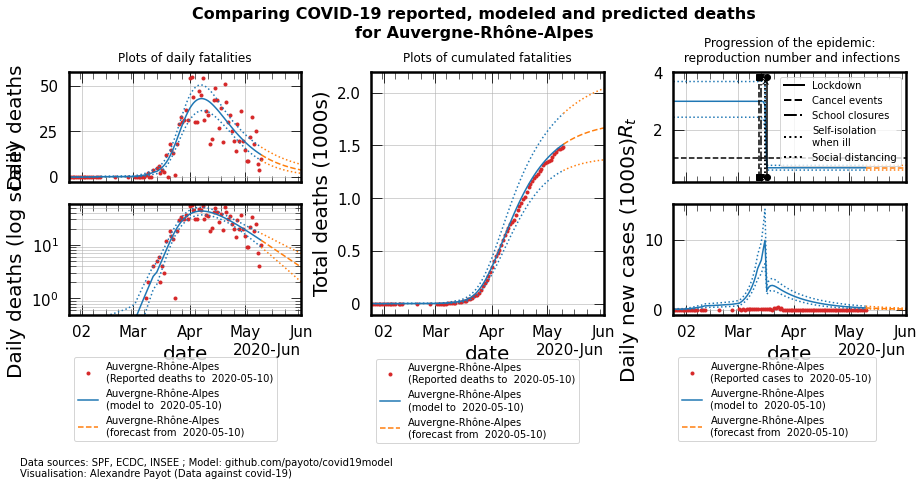

In [13]:
apply_process_to_data(process_zone, country_2_region, analysis_set, zone_dict)

In [14]:
report_dir = os.path.join('reports', 'all_zone_report')
img_dir = os.path.join(report_dir, 'img')
os.makedirs(report_dir, exist_ok=True)
os.makedirs(img_dir, exist_ok=True)
report_file = os.path.join(report_dir, "all_zone_report.md")
with open(report_file, "w", encoding="utf-8") as file_in:
    print_partial = partial(print_zone, file_in, img_dir, report_dir)
    apply_process_to_data(
        print_partial, country_2_region, analysis_set, zone_dict,
        file_in.write)

analysis_set

In [15]:
analysis_set

,folder,version,last available data,number of countries,number of zones,countries,modelling zones,,model
0,./runs/base-fullrun-20200423T024310-3636909,v2,2020-03-24,1,15,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",,<model_analysis.data_load.Model_Folder object ...
1,./runs/base-fullrun-20200423T191520-3638433,v2,2020-03-24,1,15,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",,<model_analysis.data_load.Model_Folder object ...
2,./runs/base-fullrun-20200501T183749-3677778,v3,2020-03-24,1,15,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",,<model_analysis.data_load.Model_Folder object ...
3,./runs/base-fullrun-20200501T232541-3678269,v3,2020-03-24,1,29,{'France': True},"{'Aisne': True, 'Aude': True, 'Bas-Rhin': True...",,<model_analysis.data_load.Model_Folder object ...
4,./runs/base-fullrun-20200423T193320-3638456,v2,2020-03-24,13,27,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
5,./runs/base-fullrun-20200501T180704-3677777,v3,2020-03-24,13,27,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
6,./runs/base-fullrun-20200424T082058-3641029,v2,2020-04-01,1,17,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",,<model_analysis.data_load.Model_Folder object ...
7,./runs/base-fullrun-20200501T183651-3677779,v3,2020-04-01,1,17,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",,<model_analysis.data_load.Model_Folder object ...
8,./runs/base-fullrun-20200501T232557-3678269,v3,2020-04-01,1,61,{'France': True},"{'Ain': True, 'Aisne': True, 'Alpes-Maritimes'...",,<model_analysis.data_load.Model_Folder object ...
9,./runs/base-fullrun-20200423T193324-3638456,v2,2020-04-01,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...


In [16]:
pop_rg_file = pd.read_csv("./french_population_age_regional_2.csv")

In [17]:
rg = []
pop = []
code_rg = []
dens = []
for i in range(12+1):
    rg += [pop_rg_file.loc[i]["name"]]
    code_rg += [pop_rg_file.loc[i]["fra_code"]]
    pop += [pop_rg_file.loc[i]["total"]]
    dens += [pop_rg_file.loc[i]["densite"]]

In [18]:
rg

['Auvergne-Rhône-Alpes',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Grand Est',
 'Occitanie',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Centre-Val de Loire',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Corse',
 'Pays de la Loire',
 'Île-de-France']

In [19]:
pop_rg_file.loc[:12]

,name,fra_code,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,total,densite
0,Auvergne-Rhône-Alpes,REG-84,949955,993524,901366,1004809,1041062,1040667,924286,659703,490510,8005882,112
1,Hauts-de-France,REG-32,747088,795247,698337,755993,766398,767272,703918,429351,313833,5977437,189
2,Provence-Alpes-Côte d'Azur,REG-93,556476,576571,517017,598183,637206,677902,631839,492051,361160,5048405,159
3,Grand Est,REG-44,609398,663160,623642,677704,705620,758833,703089,445993,337852,5525291,97
4,Occitanie,REG-76,631407,694384,634314,693614,745017,784106,753107,545809,417451,5899209,79
5,Normandie,REG-28,375628,415110,346929,387009,413015,438587,430212,284333,222517,3313340,112
6,Nouvelle-Aquitaine,REG-75,607674,692814,596967,679566,764438,804089,811702,573291,455777,5986318,70
7,Centre-Val de Loire,REG-24,289784,314123,251832,293495,325727,341526,333147,229367,186257,2565258,66
8,Bourgogne-Franche-Comté,REG-27,299642,335230,279691,317807,348123,375500,373352,262102,201886,2793333,59
9,Bretagne,REG-53,362949,417398,336406,380228,428400,442035,436034,296262,234008,3333720,120


In [20]:
pop_rg = pd.DataFrame(data=[code_rg, pop, dens], columns=rg)

In [21]:
pop_rg

,Auvergne-Rhône-Alpes,Hauts-de-France,Provence-Alpes-Côte d'Azur,Grand Est,Occitanie,Normandie,Nouvelle-Aquitaine,Centre-Val de Loire,Bourgogne-Franche-Comté,Bretagne,Corse,Pays de la Loire,Île-de-France
0,REG-84,REG-32,REG-93,REG-44,REG-76,REG-28,REG-75,REG-24,REG-27,REG-53,REG-94,REG-52,REG-11
1,8005882,5977437,5048405,5525291,5899209,3313340,5986318,2565258,2793333,3333720,341554,3787400,12244807
2,112,189,159,97,79,112,70,66,59,120,37,115,1001


In [22]:
that_day = {}
for reg in pop_rg.columns:
    that_day[reg] = {}
    m = analysis_set.loc[50, "model"].data["modelling"]["region"]==reg
    for i, j in enumerate(analysis_set.loc[50, "model"].data["modelling"][m]["deaths_c"]):
        if j/pop_rg[reg][1] < 1e-5:
            temp = j
            idx = analysis_set.loc[50, "model"].data["modelling"][m]["deaths_c"].index[i]
            date = analysis_set.loc[50, "model"].data["modelling"][m]["date"].loc[idx]
            prop = j/pop_rg[reg][1]
            rt = analysis_set.loc[50, "model"].data["modelling"][m]["rt"].loc[idx]
            idx2 = analysis_set.loc[50, "model"].data["modelling"][m]["deaths_c"].index[0]
            r0 = analysis_set.loc[50, "model"].data["modelling"][m]["rt"].loc[idx2]
    that_day[reg]["prop"] = prop
    that_day[reg]["date"] = date
    that_day[reg]["pop_rg"] = pop_rg[reg][1]
    that_day[reg]["death_c"] = temp
    that_day[reg]["index"] = idx
    that_day[reg]["rt"] = rt
    that_day[reg]["r0"] = r0
    that_day[reg]["dens_rg"] = pop_rg[reg][2]

In [23]:
res = pd.DataFrame(that_day).transpose()

In [24]:
res

,prop,date,pop_rg,death_c,index,rt,r0,dens_rg
Auvergne-Rhône-Alpes,8.99339e-06,2020-03-22,8005882,72,38,0.664384,2.98712,112
Hauts-de-France,9.20127e-06,2020-03-18,5977437,55,538,0.657091,2.48203,189
Provence-Alpes-Côte d'Azur,9.50795e-06,2020-03-27,5048405,48,950,0.728297,4.00882,159
Grand Est,9.23028e-06,2020-03-16,5525291,51,445,2.38254,2.4968,97
Occitanie,9.15377e-06,2020-03-26,5899209,54,788,0.703837,2.36363,79
Normandie,9.65793e-06,2020-03-29,3313340,32,628,0.541907,3.39926,112
Nouvelle-Aquitaine,9.68876e-06,2020-03-29,5986318,58,707,0.625495,2.89586,70
Centre-Val de Loire,7.79649e-06,2020-03-26,2565258,20,287,0.711444,3.41338,66
Bourgogne-Franche-Comté,8.23389e-06,2020-03-19,2793333,23,120,0.632887,2.62084,59
Bretagne,9.59889e-06,2020-03-27,3333720,32,211,0.518042,2.73826,120


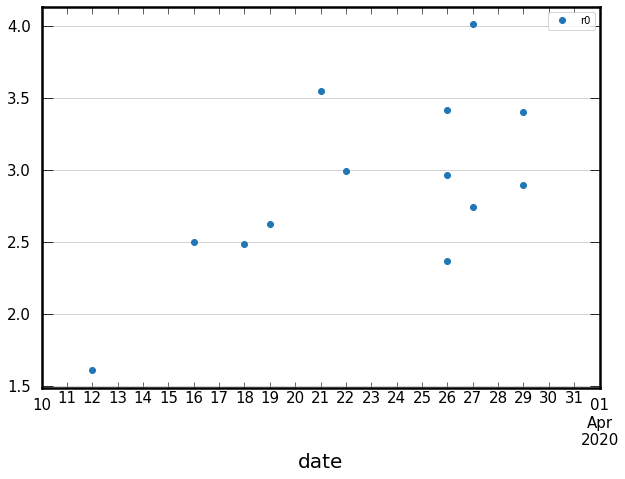

In [25]:
res.plot(x="date", y="r0",style="o", figsize=(10,7),xlim=["2020-03-10","2020-04-01"],grid=True)

## Plot with matplotlib

In [26]:
i=0
date = []
r0 = []
for reg in res.index:
    date += [res["date"].loc[reg].strftime('%Y-%m-%d')]
    r0 += [res["r0"].loc[reg]]
    print(reg,that_day[reg]["date"].strftime('%Y-%m-%d'), that_day[reg]["prop"])
    i+=1
#ax.xaxis.set_major_formatter(myFmt)

Auvergne-Rhône-Alpes 2020-03-22 8.993387611758454e-06
Hauts-de-France 2020-03-18 9.201268035112708e-06
Provence-Alpes-Côte d'Azur 2020-03-27 9.507953502145726e-06
Grand Est 2020-03-16 9.230283074683305e-06
Occitanie 2020-03-26 9.153769598602118e-06
Normandie 2020-03-29 9.657928253665486e-06
Nouvelle-Aquitaine 2020-03-29 9.688760269668267e-06
Centre-Val de Loire 2020-03-26 7.796486747142003e-06
Bourgogne-Franche-Comté 2020-03-19 8.233891197361719e-06
Bretagne 2020-03-27 9.598886529162618e-06
Corse 2020-03-12 8.783384179368416e-06
Pays de la Loire 2020-03-26 8.18503458837197e-06
Île-de-France 2020-03-21 9.963407344844227e-06


In [27]:
r0_sorted = [x for y,x in sorted(zip(date,r0))]

In [28]:
rg_sorted = [x for y,x in sorted(zip(date,rg))]

In [29]:
date_sorted = sorted(date)

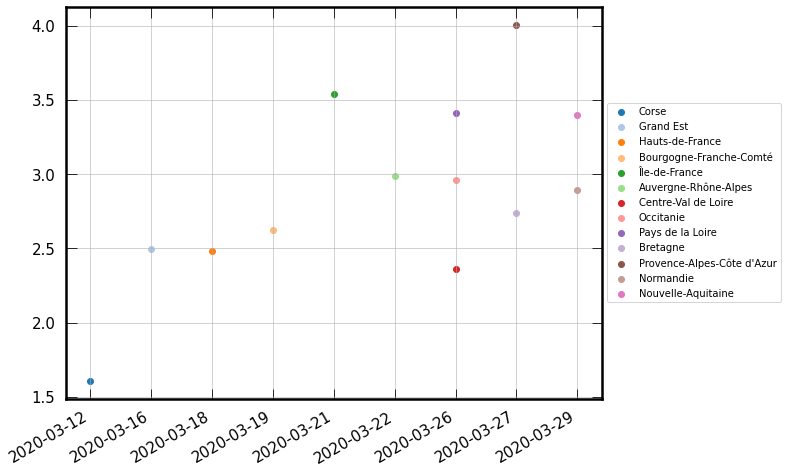

In [30]:
col = pl.cm.tab20(np.linspace(0,1,20))
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
for i in range(13):
    ax.scatter(date_sorted[i], r0_sorted[i], label=rg_sorted[i],color=col[i])
fig.autofmt_xdate()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

## Test Pop Vs R0

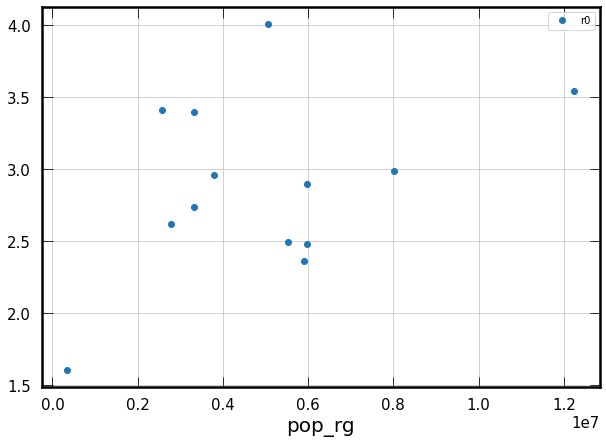

In [31]:
res.plot(x="pop_rg", y="r0",style="o", figsize=(10,7),grid=True)

## Test Density Vs R0

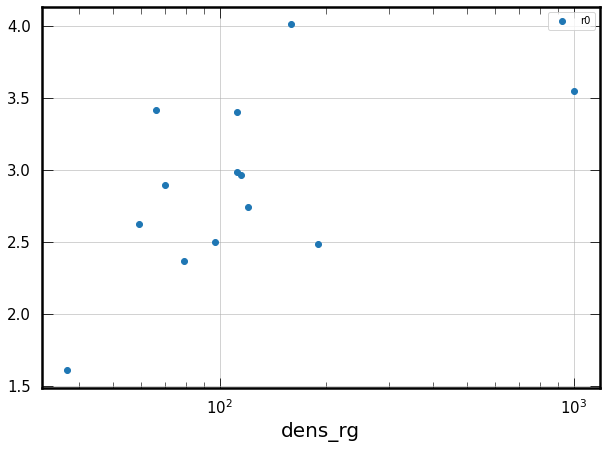

In [32]:
res.plot(x="dens_rg", y="r0",style="o", figsize=(10,7),grid=True,logx=True)

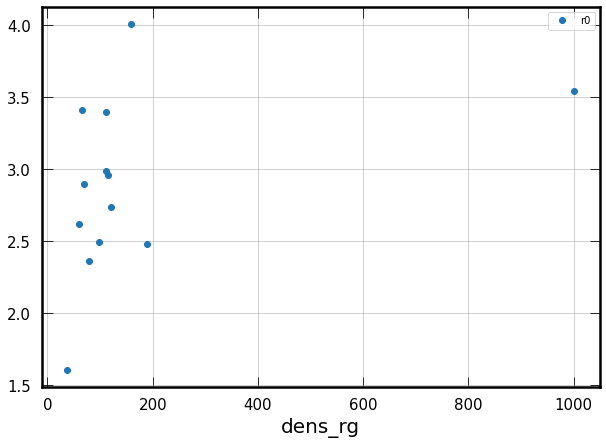

In [33]:
res.plot(x="dens_rg", y="r0",style="o", figsize=(10,7),grid=True)

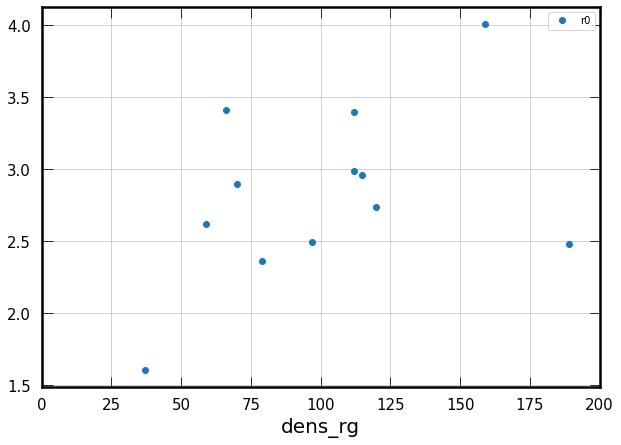

In [34]:
res.plot(x="dens_rg", y="r0",style="o", figsize=(10,7),grid=True,xlim=[0,200])